# EDA & Preprocessing


In [1]:
#bring in packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", palette="deep")
from datetime import datetime

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import rgb2hex

In [79]:
#bring in data
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

data1 = pd.read_csv('data/LoanStats3a.csv', low_memory=False, skiprows=1, usecols=range(2,145), 
                    parse_dates=date_cols, infer_datetime_format=True)
data2 = pd.read_csv('data/LoanStats3b.csv', low_memory=False, skiprows=1, usecols=range(2,145), 
                    parse_dates=date_cols, infer_datetime_format=True)
data3 = pd.read_csv('data/LoanStats3c.csv', low_memory=False, skiprows=1, usecols=range(2,145),
                    parse_dates=date_cols, infer_datetime_format=True)
data4 = pd.read_csv('data/LoanStats3d.csv', low_memory=False, skiprows=1, usecols=range(2,145),
                    parse_dates=date_cols, infer_datetime_format=True)

In [80]:
data = data1.append(data2)
data = data.append(data3)
data = data.append(data4)

In [81]:
data.shape

(887449, 143)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887449 entries, 0 to 421096
Columns: 143 entries, loan_amnt to settlement_term
dtypes: datetime64[ns](5), float64(106), object(32)
memory usage: 975.0+ MB


In [41]:
#look at categorical variables
data.describe(include=['O']).T

,count,unique,top,freq
term,887440,2,36 months,621169
int_rate,887440,544,10.99%,34620
grade,887440,7,B,254553
sub_grade,887440,35,B3,56327
emp_title,835972,299284,Teacher,13472
emp_length,887440,12,10+ years,291594
home_ownership,887440,6,MORTGAGE,443591
verification_status,887440,3,Source Verified,329576
issue_d,887440,103,Oct-2015,48631
loan_status,887440,9,Fully Paid,493840


In [42]:
#look at numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,887440.0,14755.167673,8435.379336,5.000000e+02,8000.000000,13000.000000,20000.000000,3.500000e+04
funded_amnt,887440.0,14741.781613,8429.821570,5.000000e+02,8000.000000,13000.000000,20000.000000,3.500000e+04
funded_amnt_inv,887440.0,14702.371131,8442.029492,0.000000e+00,8000.000000,13000.000000,20000.000000,3.500000e+04
installment,887440.0,436.698470,244.178108,4.930000e+00,260.650000,382.550000,572.600000,1.445460e+03
annual_inc,887436.0,75026.276777,64696.699111,0.000000e+00,45000.000000,65000.000000,90000.000000,9.500000e+06
url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,887438.0,18.134669,8.413134,0.000000e+00,11.910000,17.660000,23.950000,9.990000e+02
delinq_2yrs,887411.0,0.314439,0.862233,0.000000e+00,0.000000,0.000000,0.000000,3.900000e+01
inq_last_6mths,887411.0,0.694650,0.998472,0.000000e+00,0.000000,0.000000,1.000000,3.300000e+01
mths_since_last_delinq,433098.0,34.063949,21.885021,0.000000e+00,15.000000,31.000000,50.000000,1.880000e+02


loan_status
Charged Off                                            125309
Current                                                247699
Default                                                   123
Does not meet the credit policy. Status:Charged Off       761
Does not meet the credit policy. Status:Fully Paid       1988
Fully Paid                                             493840
In Grace Period                                          5476
Late (16-30 days)                                        2426
Late (31-120 days)                                       9818
Name: loan_status, dtype: int64


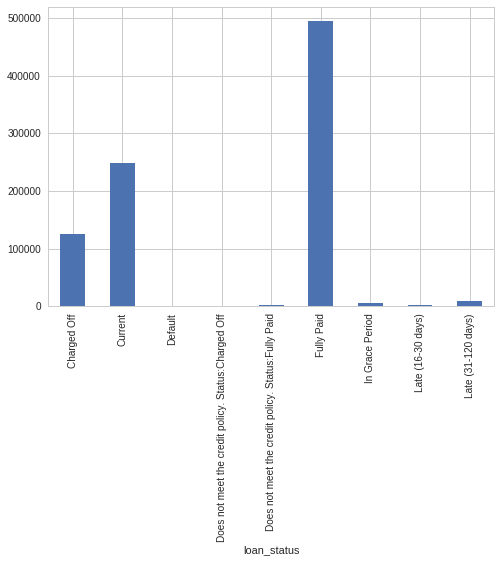

In [83]:
#look at the feature that will be the 'y' - loan status distribution 
loans_by_status = data.groupby('loan_status')
print(loans_by_status['loan_status'].count())
loans_by_status['loan_status'].count().plot(kind='bar')

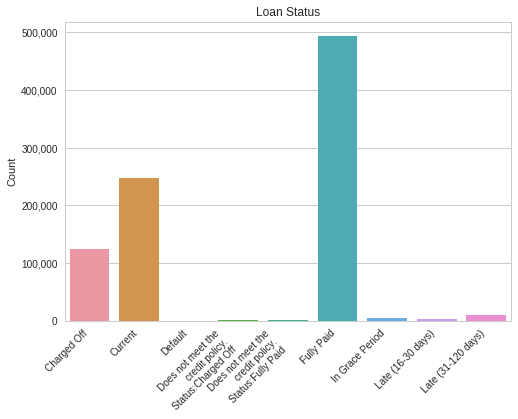

In [84]:
#look at target variable
sns.countplot(data.loan_status, order=['Charged Off', 'Current', 'Default', 'Does not meet the credit policy. Status:Charged Off',
        'Does not meet the credit policy. Status:Fully Paid', 
        'Fully Paid', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)'])
plt.xlabel('')
plt.ylabel('Count')
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#ax.set_xticklabels(labels, rotation=45)
plt.title('Loan Status')
from textwrap import wrap
labels=['Charged Off', 'Current', 'Default', 'Does not meet the credit policy. Status:Charged Off',
        'Does not meet the credit policy. Status:Fully Paid', 
        'Fully Paid', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)']
labels = [ '\n'.join(wrap(l, 20)) for l in labels ]
ax.set_xticklabels(labels, rotation=45, ha = 'right')
plt.tight_layout

plt.savefig('figures/LoanStatus.png', bbox_inches='tight')

In [110]:
#create new column for binary classification on default/no-default loans
data['default'] = None

In [111]:
#combine loan statuses into default (0) and not default (1)
data.loc[(data.loan_status == 'Fully Paid') | 
         (data.loan_status == 'Does not meet the credit policy. Status:Fully Paid'),
         'default'] = 1
data.loc[(data.loan_status == 'Charged Off') | 
         (data.loan_status == 'Does not meet the credit policy. Status:Charged Off') |
         (data.loan_status == 'Default'),
         'default'] = 0

#drop loans that are still active
data_subset = data[~data.default.isnull()]

In [112]:
#encode default column as numeric
data_subset['default'] = pd.to_numeric(data_subset['default'])

/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [113]:
data_subset.shape

(622021, 144)

In [114]:
data_subset['purpose'].value_counts() 

debt_consolidation    369479
credit_card           136883
home_improvement       36325
other                  31358
major_purchase         12760
small_business          8322
car                     6818
medical                 6227
moving                  4118
vacation                3553
house                   2977
wedding                 2322
renewable_energy         456
educational              423
Name: purpose, dtype: int64

In [115]:
data_subset['loan_purpose'] = None  #create new empty column

/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [116]:
#combine purpose categories
data_subset.loc[(data_subset.purpose == 'debt_consolidation') |
                   (data_subset.purpose == 'credit_card') |
                   (data_subset.purpose == 'educational'), 
                   'loan_purpose'] = 'debt_payoff'
data_subset.loc[(data_subset.purpose == 'home_improvement') |
                (data_subset.purpose == 'house') | 
                (data_subset.purpose == 'moving') , 'loan_purpose'] = 'house'
data_subset.loc[(data_subset.purpose == 'major_purchase') |
                (data_subset.purpose == 'car'), 'loan_purpose'] = 'large_purchase'
data_subset.loc[(data_subset.purpose == 'medical'), 'loan_purpose'] = 'medical'
data_subset.loc[(data_subset.purpose == 'other') |
                (data_subset.purpose == 'wedding') |
                (data_subset.purpose == 'vacation') |
                (data_subset.purpose == 'renewable_energy'), 'loan_purpose'] = 'other'
data_subset.loc[(data_subset.purpose == 'small_business'), 'loan_purpose'] = 'business'

/home/nick/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [117]:
data_subset.emp_length.replace(['n/a'], [np.nan], inplace=True)
data_subset['employ_length'] = None

/home/nick/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [118]:
#combine employment categories
data_subset.loc[(data_subset.emp_length == '< 1 year') |
                (data_subset.emp_length == '1 year') | 
                (data_subset.emp_length == '2 years'), 'employ_length'] = '<= 2yr'
data_subset.loc[(data_subset.emp_length == '3 years') |
                (data_subset.emp_length == '4 years') |
                (data_subset.emp_length == '5 years') |
                (data_subset.emp_length == '6 years') |
                (data_subset.emp_length == '7 years'), 'employ_length'] = '3 - 7 yrs'
data_subset.loc[(data_subset.emp_length == '8 years') |
                (data_subset.emp_length == '9 years') |
                (data_subset.emp_length == '10+ years'), 'employ_length'] = '>= 8yrs'

/home/nick/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [119]:
#create new column for 'credit_life_mths'  months from first time opened credit to loan issues/fund date
data_subset['credit_life_mths'] = (data_subset.issue_d - data_subset.earliest_cr_line)/ np.timedelta64(1, 'M')

/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [120]:
data_subset['home_owner'] = None  #create new empty column

/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [121]:
#combine home ownership categories into 4 groups
data_subset.loc[(data_subset.home_ownership == 'OTHER') |
                   (data_subset.home_ownership == 'NONE') |
                   (data_subset.home_ownership == 'ANY'), 
                   'home_owner'] = 'OTHER'
data_subset.loc[(data_subset.home_ownership == 'RENT'), 'home_owner'] = 'RENT'
data_subset.loc[(data_subset.home_ownership == 'MORTGAGE'), 'home_owner'] = 'MORTGAGE'
data_subset.loc[(data_subset.home_ownership == 'OWN'), 'home_owner'] = 'OWN'

/home/nick/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [122]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622021 entries, 0 to 421094
Columns: 148 entries, loan_amnt to home_owner
dtypes: datetime64[ns](5), float64(107), int64(1), object(35)
memory usage: 727.1+ MB


In [129]:
#drop JOINT applications 
data_subset = data_subset.drop(data_subset[data_subset.application_type == 'JOINT'].index)

#remove unnecessary and superfluous features
drop_cols = ['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
             'open_acc_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
             'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 
             'total_cu_tl', 'inq_last_12m', 'emp_title', 'desc', 'url', 'pymnt_plan', 'next_pymnt_d', 
             'title', 'loan_status', 'initial_list_status', 'home_ownership', 'purpose', 
             'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'revol_util',
             'application_type', 'policy_code', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment',
             'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
             'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'acc_now_delinq',
             'grade', 'sub_grade', 'emp_length', 'open_act_il', 
             'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
             'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
             'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
             'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 
             'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
             'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
             'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc',
             'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 
             'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 
             'sec_app_mths_since_last_major_derog', 'hardship_flag', 'hardship_type', 'hardship_reason',
             'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 
             'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status',
             'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 
             'hardship_last_payment_amount', 'disbursement_method', 'debt_settlement_flag', 'debt_settlement_flag_date',
             'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term'] 

data_subset.drop(drop_cols, axis=1, inplace=True)

In [130]:
#impute the median annual income if null
data_subset['annual_inc'].fillna((data_subset['annual_inc'].median()), inplace=True)

In [131]:
#replace nan's with 0's for certain columns
data_subset['mths_since_last_delinq'] = data_subset['mths_since_last_delinq'].replace(np.nan, 0)
data_subset['mths_since_last_major_derog'] = data_subset['mths_since_last_major_derog'].replace(np.nan, 0)
data_subset['mths_since_last_record'] = data_subset['mths_since_last_record'].replace(np.nan, 0)
data_subset['delinq_2yrs'] = data_subset['delinq_2yrs'].replace(np.nan, 0)
data_subset['collections_12_mths_ex_med'] = data_subset['collections_12_mths_ex_med'].replace(np.nan, 0)

In [132]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622021 entries, 0 to 421094
Data columns (total 36 columns):
loan_amnt                      622021 non-null float64
term                           622021 non-null object
annual_inc                     622021 non-null float64
verification_status            622021 non-null object
issue_d                        622021 non-null datetime64[ns]
zip_code                       622021 non-null object
addr_state                     622021 non-null object
dti                            622019 non-null float64
delinq_2yrs                    622021 non-null float64
earliest_cr_line               621992 non-null datetime64[ns]
inq_last_6mths                 621992 non-null float64
mths_since_last_delinq         622021 non-null float64
mths_since_last_record         622021 non-null float64
open_acc                       621992 non-null float64
pub_rec                        621992 non-null float64
revol_bal                      622021 non-null float64

In [133]:
data_subset = data_subset.dropna()

In [134]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518735 entries, 0 to 421094
Data columns (total 36 columns):
loan_amnt                      518735 non-null float64
term                           518735 non-null object
annual_inc                     518735 non-null float64
verification_status            518735 non-null object
issue_d                        518735 non-null datetime64[ns]
zip_code                       518735 non-null object
addr_state                     518735 non-null object
dti                            518735 non-null float64
delinq_2yrs                    518735 non-null float64
earliest_cr_line               518735 non-null datetime64[ns]
inq_last_6mths                 518735 non-null float64
mths_since_last_delinq         518735 non-null float64
mths_since_last_record         518735 non-null float64
open_acc                       518735 non-null float64
pub_rec                        518735 non-null float64
revol_bal                      518735 non-null float64

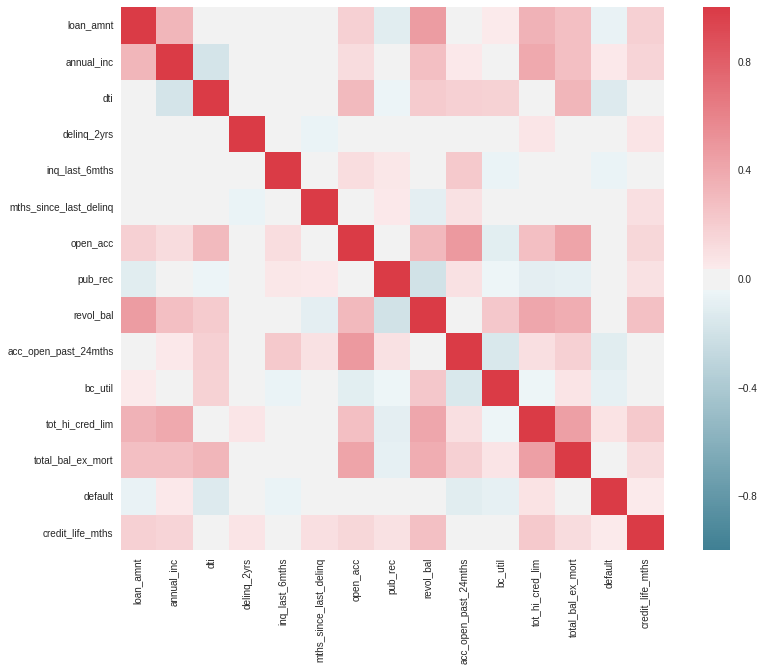

In [215]:
import seaborn as sns

#create dataframe of just numeric fields
cat_feats = ['term', 'employ_length', 'verification_status', 'issue_d', 'loan_purpose', 'zip_code',
             'addr_state', 'earliest_cr_line', 'home_owner']
data_num = data_subset.drop(cat_feats, axis=1)

f, ax = plt.subplots(figsize=(14, 10))
corr = data_num.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.tight_layout

plt.savefig('figures/CorrMap.png', bbox_inches='tight')

In [216]:
collinear_vars = ['mths_since_last_record', 'mths_since_last_major_derog', 'total_acc', 'total_il_high_credit_limit',
                  'total_bc_limit', 'pub_rec_bankruptcies', 'tax_liens', 'avg_cur_bal',
                  'bc_open_to_buy', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'delinq_amnt']
data_subset = data_subset.drop(collinear_vars, axis=1)

#recreate dataframe of just numeric fields
cat_feats = ['term', 'employ_length', 'verification_status', 'issue_d', 'loan_purpose', 'zip_code',
             'addr_state', 'earliest_cr_line', 'home_owner']
data_num = data_subset.drop(cat_feats, axis=1)

f, ax = plt.subplots(figsize=(14, 10))
corr = data_num.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

ValueError: labels ['mths_since_last_record' 'mths_since_last_major_derog' 'total_acc'
 'total_il_high_credit_limit' 'total_bc_limit' 'pub_rec_bankruptcies'
 'tax_liens' 'avg_cur_bal' 'bc_open_to_buy' 'collections_12_mths_ex_med'
 'chargeoff_within_12_mths' 'delinq_amnt'] not contained in axis

In [ ]:
#create pairplot of numeric variables
#sns.set(style='whitegrid', context='notebook')

#sns.pairplot(data_num, hue = 'default', size = 2)
#plt.legend()
#plt.tight_layout()
#plt.show()

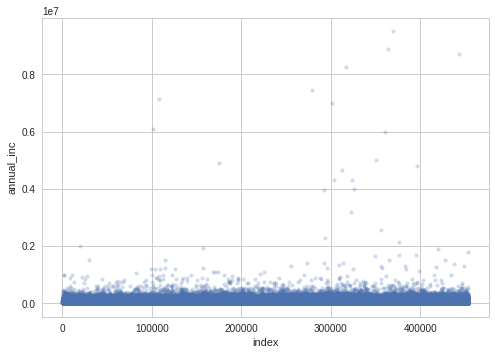

In [217]:
#look at annual income 
plt.scatter(x=range(data_subset['annual_inc'].shape[0]), y=data_subset.annual_inc, marker='.', alpha=0.25)
plt.xlabel('index')
plt.ylabel('annual_inc')
ax = plt.gca()

In [218]:
#appears to be some outliers in annual income
np.percentile(data_subset.annual_inc, [50, 75, 85, 90, 95, 97, 98, 99, 100])

array([   65000.,    90000.,   105000.,   120000.,   150000.,   170000.,
         190000.,   230000.,  9500000.])

In [219]:
ann_inc_outliers = np.percentile(data_subset.annual_inc, 99)

#removing annual income greater than 99th percentile 
data_subset_clean = data_subset[(data_subset['annual_inc'] <= ann_inc_outliers)]

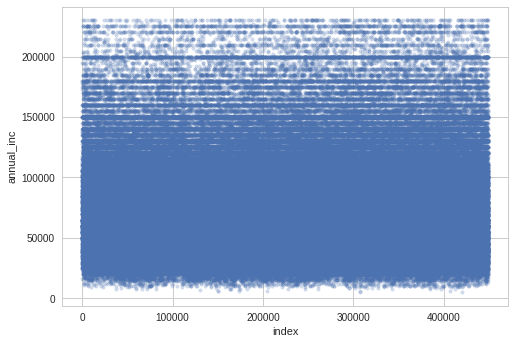

In [220]:
plt.scatter(x=range(data_subset_clean['annual_inc'].shape[0]), y=data_subset_clean.annual_inc, marker='.', alpha=0.25)
plt.xlabel('index')
plt.ylabel('annual_inc')
ax = plt.gca()
#looks much better

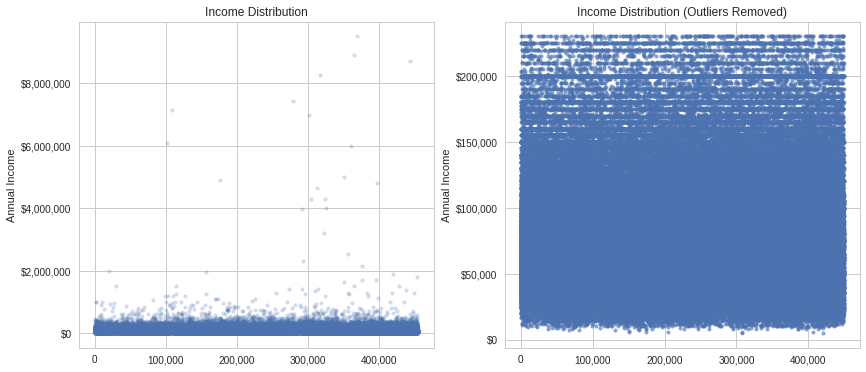

In [221]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(x=range(data_subset['annual_inc'].shape[0]), y=data_subset.annual_inc, marker='.', alpha=0.25)
plt.xlabel('')
plt.ylabel('Annual Income')
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.title('Income Distribution')

plt.subplot(1,2,2)
plt.scatter(x=range(data_subset_clean.shape[0]), y=data_subset_clean.annual_inc, marker='.', alpha=0.65)
#plt.xlabel('')
plt.ylabel('Annual Income')
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.title('Income Distribution (Outliers Removed)')
plt.tight_layout

plt.savefig('figures/IncPlot.png', bbox_inches='tight')

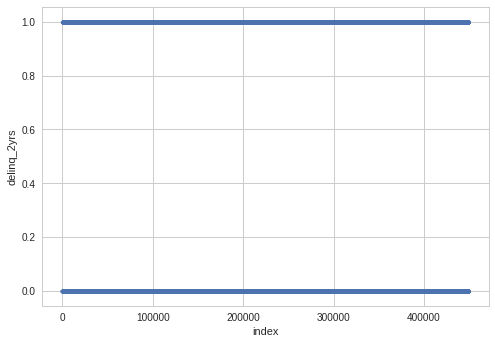

In [222]:
plt.scatter(x=range(data_subset_clean['delinq_2yrs'].shape[0]), y=data_subset_clean.delinq_2yrs, marker='.', alpha=0.25)
plt.xlabel('index')
plt.ylabel('delinq_2yrs')
ax = plt.gca()

In [223]:
np.percentile(data_subset_clean.delinq_2yrs, [50, 75, 85, 90, 95, 97, 98, 99, 100])

array([ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.])

In [224]:
data_subset.delinq_2yrs.describe()

count    453523.000000
mean          0.135649
std           0.342416
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: delinq_2yrs, dtype: float64

In [225]:
#keep delinq_2yrs data that are within +3 to -3 standard deviations 
data_subset_clean = data_subset_clean[np.abs(data_subset_clean.delinq_2yrs - data_subset_clean.delinq_2yrs.mean()) 
                          <= (3*data_subset_clean.delinq_2yrs.std())]

In [226]:
data_subset_clean.delinq_2yrs.describe()

count    449124.000000
mean          0.135165
std           0.341900
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: delinq_2yrs, dtype: float64

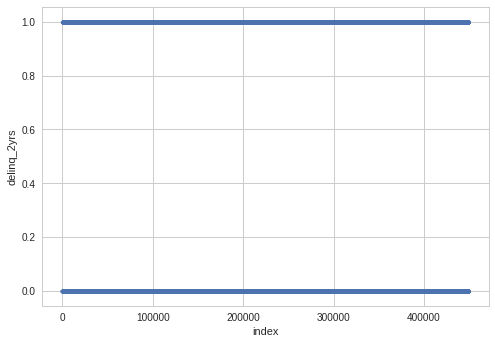

In [227]:
plt.scatter(x=range(data_subset_clean['delinq_2yrs'].shape[0]), y=data_subset_clean.delinq_2yrs, marker='.', alpha=0.25)
plt.xlabel('index')
plt.ylabel('delinq_2yrs')
ax = plt.gca()

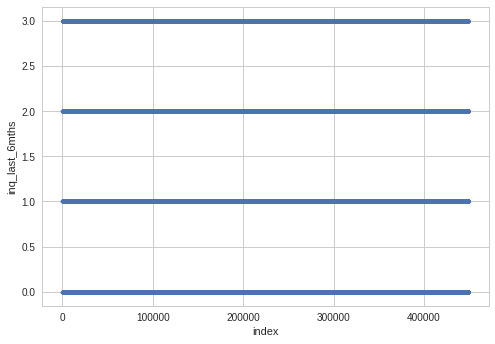

In [228]:
plt.scatter(x=range(data_subset_clean['inq_last_6mths'].shape[0]), y=data_subset_clean.inq_last_6mths, marker='.', alpha=0.25)
plt.xlabel('index')
plt.ylabel('inq_last_6mths')
ax = plt.gca()

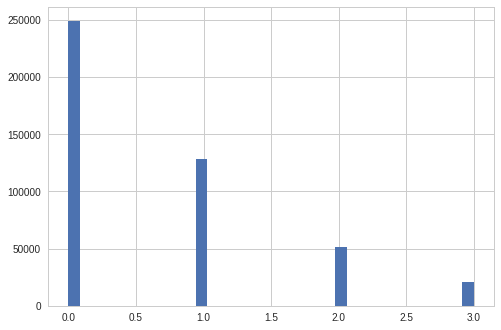

In [229]:
data_subset_clean.inq_last_6mths.hist(bins=35)

In [230]:
np.percentile(data_subset_clean.inq_last_6mths, [75, 85, 90, 95, 96, 97, 98, 99, 100])

array([ 1.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.])

In [231]:
data_subset_clean.inq_last_6mths.describe()

count    449124.000000
mean          0.652704
std           0.855716
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           3.000000
Name: inq_last_6mths, dtype: float64

In [232]:
#keep inq_last_6mths data that are within +3 to -3 standard deviations 
data_subset_clean = data_subset_clean[np.abs(data_subset_clean.inq_last_6mths - data_subset_clean.inq_last_6mths.mean()) 
                          <= (3*data_subset_clean.inq_last_6mths.std())]

In [233]:
data_subset_clean.inq_last_6mths.describe()

count    449124.000000
mean          0.652704
std           0.855716
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           3.000000
Name: inq_last_6mths, dtype: float64

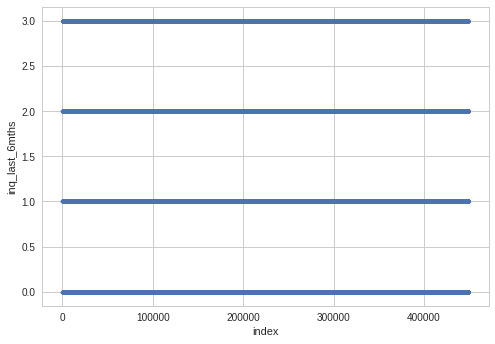

In [234]:
plt.scatter(x=range(data_subset_clean['inq_last_6mths'].shape[0]), y=data_subset_clean.inq_last_6mths, marker='.', alpha=0.25)
plt.xlabel('index')
plt.ylabel('inq_last_6mths')
ax = plt.gca()

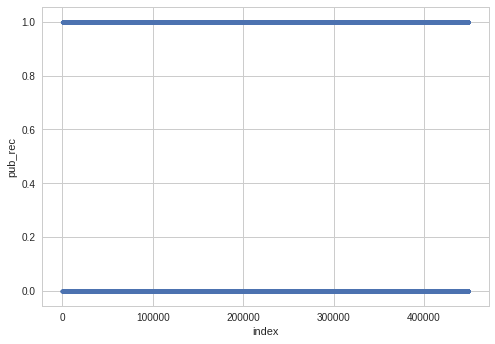

In [235]:
plt.scatter(x=range(data_subset_clean['pub_rec'].shape[0]), y=data_subset_clean.pub_rec, marker='.', alpha=0.25)
plt.xlabel('index')
plt.ylabel('pub_rec')
ax = plt.gca()

In [236]:
np.percentile(data_subset_clean.pub_rec, [75, 85, 90, 95, 96, 97, 98, 99, 100])

array([ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [237]:
data_subset_clean.pub_rec.describe()

count    449124.000000
mean          0.139997
std           0.346984
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: pub_rec, dtype: float64

In [238]:
#keep pub_rec data that are within +3 to -3 standard deviations 
data_subset_clean = data_subset_clean[(np.abs(data_subset_clean.pub_rec - data_subset_clean.pub_rec.mean())) 
                          <= (3*data_subset_clean.pub_rec.std())]

In [239]:
data_subset_clean.pub_rec.describe()

count    449124.000000
mean          0.139997
std           0.346984
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: pub_rec, dtype: float64

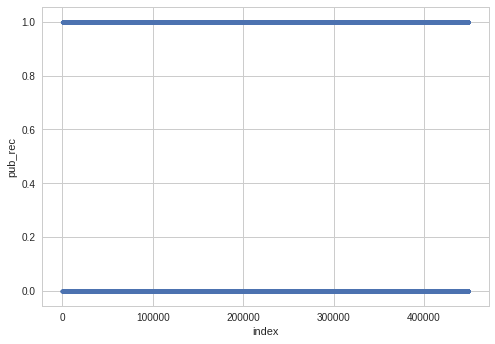

In [240]:
plt.scatter(x=range(data_subset_clean['pub_rec'].shape[0]), y=data_subset_clean.pub_rec, marker='.', alpha=0.25)
plt.xlabel('index')
plt.ylabel('pub_rec')
ax = plt.gca()

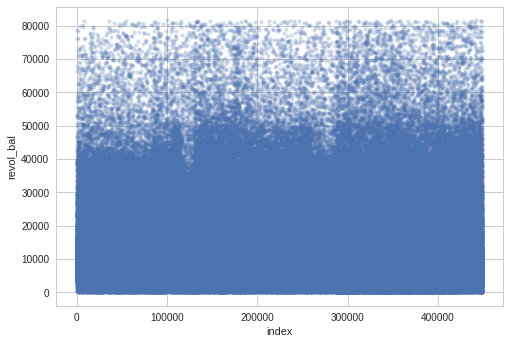

In [241]:
plt.scatter(x=range(data_subset_clean['revol_bal'].shape[0]), y=data_subset_clean.revol_bal, marker='.', alpha=0.25)
plt.xlabel('index')
plt.ylabel('revol_bal')
ax = plt.gca()

In [242]:
np.percentile(data_subset_clean.revol_bal, [75, 85, 90, 95, 96, 97, 98, 99, 100])

array([ 20232.  ,  26533.  ,  31391.  ,  39281.7 ,  41809.  ,  45179.31,
        49642.08,  58940.31,  81572.  ])

In [243]:
data_subset_clean.revol_bal.describe()

count    449124.000000
mean      15218.319789
std       12124.670971
min           0.000000
25%        6654.000000
50%       11881.000000
75%       20232.000000
max       81572.000000
Name: revol_bal, dtype: float64

In [244]:
#keep revol_bal data that are within +3 to -3 standard deviations 
data_subset_clean = data_subset_clean[np.abs(data_subset_clean.revol_bal - data_subset_clean.revol_bal.mean()) 
                          <= (3*data_subset_clean.revol_bal.std())]

In [245]:
data_subset_clean.revol_bal.describe()

count    441463.000000
mean      14393.536079
std       10415.769149
min           0.000000
25%        6574.000000
50%       11677.000000
75%       19642.000000
max       51592.000000
Name: revol_bal, dtype: float64

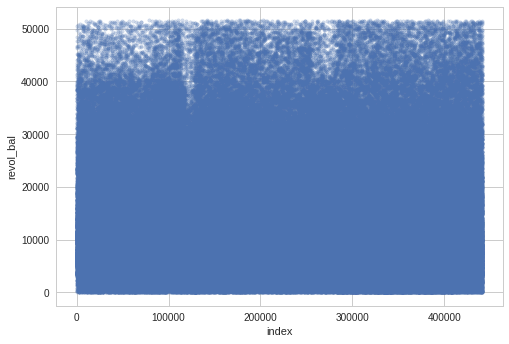

In [248]:
plt.scatter(x=range(data_subset_clean['revol_bal'].shape[0]), y=data_subset_clean.revol_bal, marker='.', alpha=0.25)
plt.xlabel('index')
plt.ylabel('revol_bal')
ax = plt.gca()

In [249]:
data_subset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441463 entries, 0 to 421094
Data columns (total 24 columns):
loan_amnt                 441463 non-null float64
term                      441463 non-null object
annual_inc                441463 non-null float64
verification_status       441463 non-null object
issue_d                   441463 non-null datetime64[ns]
zip_code                  441463 non-null object
addr_state                441463 non-null object
dti                       441463 non-null float64
delinq_2yrs               441463 non-null float64
earliest_cr_line          441463 non-null datetime64[ns]
inq_last_6mths            441463 non-null float64
mths_since_last_delinq    441463 non-null float64
open_acc                  441463 non-null float64
pub_rec                   441463 non-null float64
revol_bal                 441463 non-null float64
acc_open_past_24mths      441463 non-null float64
bc_util                   441463 non-null float64
tot_hi_cred_lim           441

In [250]:
data_subset_clean.head()

,loan_amnt,term,annual_inc,verification_status,issue_d,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,...,revol_bal,acc_open_past_24mths,bc_util,tot_hi_cred_lim,total_bal_ex_mort,default,loan_purpose,employ_length,credit_life_mths,home_owner
0,27050.0,36 months,55000.0,Verified,2013-12-01,481xx,MI,22.87,0.0,1986-10-01,...,36638.0,3.0,53.9,138554.0,70186.0,1,debt_payoff,>= 8yrs,326.019015,OWN
1,12000.0,36 months,60000.0,Not Verified,2013-12-01,281xx,NC,4.62,0.0,2009-12-01,...,7137.0,8.0,15.9,29700.0,7137.0,1,debt_payoff,3 - 7 yrs,48.000986,RENT
2,4800.0,36 months,39600.0,Source Verified,2013-12-01,782xx,TX,2.49,0.0,1995-08-01,...,4136.0,0.0,16.1,25700.0,4136.0,1,house,<= 2yr,220.029159,MORTGAGE
3,12000.0,36 months,130000.0,Source Verified,2013-12-01,809xx,CO,13.03,0.0,1997-11-01,...,10805.0,4.0,93.0,365874.0,44327.0,1,debt_payoff,>= 8yrs,192.989589,MORTGAGE
4,7550.0,36 months,28000.0,Not Verified,2013-12-01,951xx,CA,8.40,0.0,2010-10-01,...,5759.0,1.0,96.0,8000.0,5759.0,1,debt_payoff,3 - 7 yrs,38.013101,RENT


In [251]:
#create data table that shows total defaults by state
data_state = data_subset[['addr_state', 'default']].reset_index(drop=True)
default_total = data_state.groupby('addr_state').sum().reset_index(drop=False)
total_loans = data_state.groupby('addr_state').count().reset_index(drop=False)
state_data = pd.merge(left=default_total, right=total_loans, left_on='addr_state', right_on='addr_state')
cols = ['state', 'total_defaults', 'total_loans']
state_data.columns = cols
state_data['default_rate'] = (state_data['total_defaults'] / state_data['total_loans']) * 100
state_data.head()

,state,total_defaults,total_loans,default_rate
0,AK,1021,1262,80.903328
1,AL,4193,5510,76.098004
2,AR,2465,3228,76.363073
3,AZ,8758,10904,80.319149
4,CA,56460,69862,80.816467


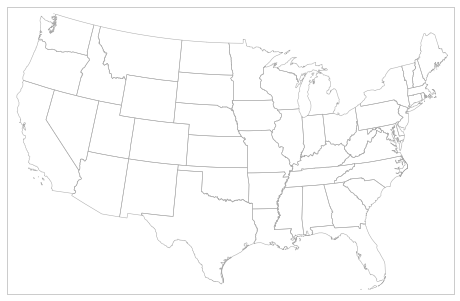

In [252]:
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
shp_info = m.readshapefile('/home/nick/MapData/cb_2016_us_state_5m',
                           name = 'states', drawbounds=True, color = 'darkgray')

#import math   
#import numbers
#patches = []
#population  = []
#for info, shape in zip(m.state_info, m.state):
#    patches.append(Polygon(np.array(shape), True))
#    if( isinstance(info['ST'], numbers.Number)  ):
#        try:
#            z = math.log10(info['POP_EST']+1.0)
#        except:
#            z = 0
#        #end try
#    else:
#        z = 0.0
#    #end if
#    population.append(z)

#print(m.states_info[0].keys())

r = zip(m.states_info, m.states)
print(r)
#m

In [253]:
import folium
import os
import json

state_geo = os.path.join('/home/nick/MapData/', 'us-states.json')

#m = folium.Map(location=[48, -102], zoom_start=4)

#m.choropleth(
    #geo_data=state_geo,
#    name='choropleth',
#    data=data_state,
#    columns=['addr_state', 'default'],
#    key_on='feature.id',
#    fill_color='YlGn',
#    fill_opacity=0.7,
#    line_opacity=0.2,
#    legend_name='Default Rate (%)'
#)


#folium.LayerControl().add_to(m)
threshold_scale = range(0, 100, 10)
m

#Let Folium determine the scale
m = folium.Map(location=[48, -102], zoom_start=4)
m.geo_json(geo_path=state_geo,
           data=state_data,
           #threshold_scale = [0,10,20,30,40,50,60,70,80,90,100],
           columns=['state', 'default_rate'],
           key_on='feature.id',
           fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
           legend_name='Default Rate (%)')
#folium.LayerControl().add_to(m)
m

/home/nick/anaconda3/lib/python3.6/site-packages/folium/folium.py:504: UserWarning: This method is deprecated. Please use Map.choropleth instead.
  warnings.warn('This method is deprecated. '
/home/nick/anaconda3/lib/python3.6/site-packages/folium/folium.py:506: FutureWarning: 'threshold_scale' default behavior has changed. Now you get a linear scale between the 'min' and the 'max' of your data. To get former behavior, use folium.utilities.split_six.
  return self.choropleth(*args, **kwargs)


In [254]:
data_subset_clean.to_csv('data/df_class.csv')